## Step 1: Setup and Data Preprocessing

- Start by importing the necessary libraries and load the spam.csv dataset.

- Preprocess the data by encoding categorical variables, defining features and target, and splitting the data into training and testing sets. Finally, apply PCA to reduce dimensionality.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset
spam = pd.read_csv("data/spam.csv")

# Encode categorical variables
categorical_columns = spam.select_dtypes(include = ['object', 'category']).columns.tolist()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    spam[col] = label_encoders[col].fit_transform(spam[col])

# Define features and target
X = spam.drop('yesno', axis = 1)
y = spam['yesno']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 2: Model Training and Decision Boundary Visualization

- Train a Decision Tree classifier on the PCA-transformed training data.

- Implement and use the `decisionplot` function (from the lecture) to visualize the decision boundary of your trained model.

## Training the Decision Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier()

## Plotting the decision boundary without data

/home/shashank/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.97


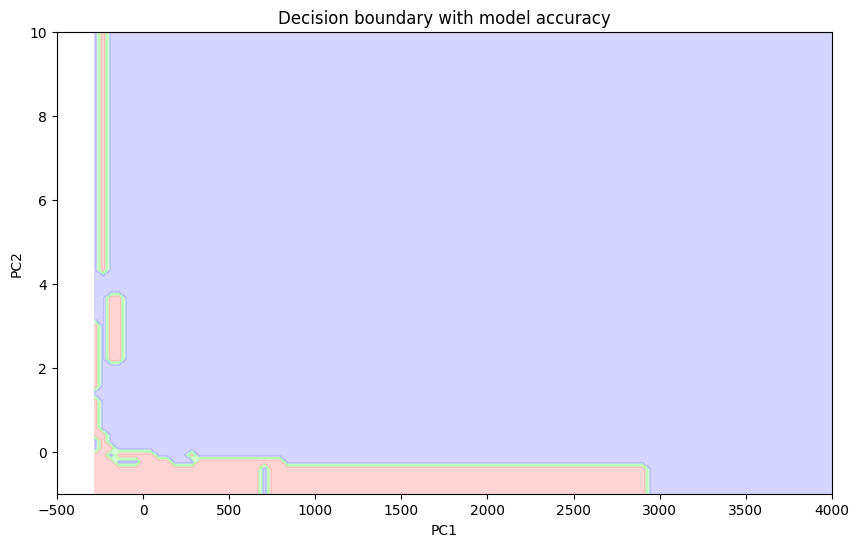

In [49]:
# Implement the decisionplot function (as provided in the lecture content)
# Add the decisionplot function here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def decisionplot_nodata(model, X, y, resolution=216):
    # Define color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)

    # # Plot the training points
    # scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=30, cmap=cmap_bold, alpha=0.025)
    # plt.legend(*scatter.legend_elements(), title="Classes")

    # Calculate the accuracy if y and predictions are provided
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    print(f'Accuracy: {acc:.2f}')

    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylim([-1,10])
    plt.xlim([-500,4000])
    plt.ylabel(X.columns[1])
    plt.title('Decision boundary with model accuracy')

    plt.show()
    
# Visualize decision boundary
decisionplot_nodata(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)

In [ ]:
## Plotting the decision boundary without data

Accuracy: 0.97


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


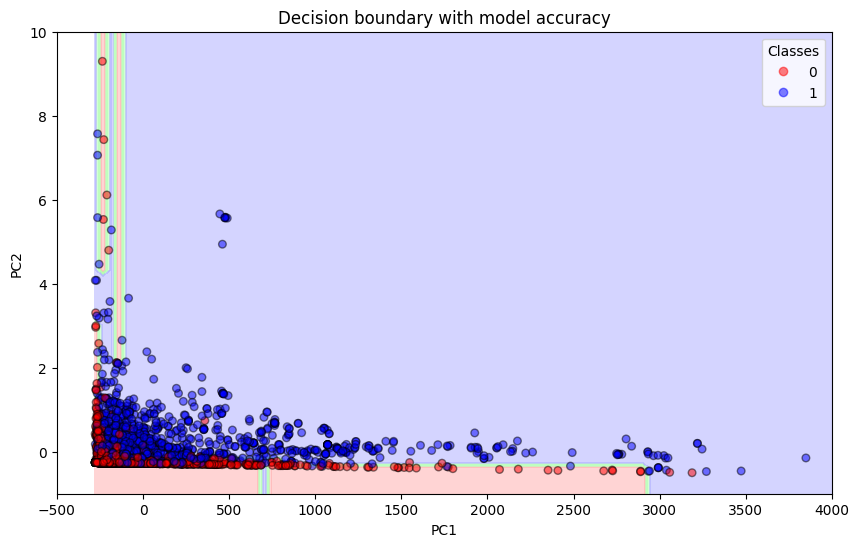

In [5]:
# Implement the decisionplot function (as provided in the lecture content)
# Add the decisionplot function here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def decisionplot_withdata(model, X, y, resolution=216):
    # Define color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)

    # # Plot the training points
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=30, cmap=cmap_bold, alpha=0.5)
    plt.legend(*scatter.legend_elements(), title="Classes")

    # Calculate the accuracy if y and predictions are provided
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    print(f'Accuracy: {acc:.2f}')

    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylim([-1,10])
    plt.xlim([-500,4000])
    plt.ylabel(X.columns[1])
    plt.title('Decision boundary with model accuracy')

    plt.show()
    
# Visualize decision boundary
decisionplot_withdata(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)

## Step 3: Model Evaluation

- Evaluate your model using accuracy, precision, recall, F1 score, and AUC-ROC metrics.

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
AUC-ROC: 0.77


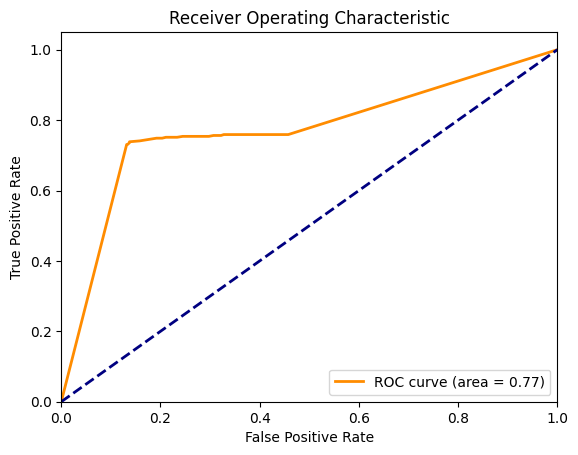

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predictions
predictions = dtree.predict(X_test_pca)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average = 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# For AUC-ROC, binarize the output and calculate AUC-ROC for each class
# Add the necessary code for AUC-ROC calculation here (refer to lecture content)

from sklearn.metrics import roc_curve, auc
# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test_pca)[:, 1])
# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Display the AUC
print(f"AUC-ROC: {roc_auc:.2f}")
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Assignment:
- Implement the missing parts of the code: the decisionplot function and AUC-ROC calculation.

- Discuss the results among your peers. Consider the following:

    - Which metric is most informative for this problem and why?

    - How does the decision boundary visualization help in understanding the model’s performance?

    - Reflect on the impact of PCA on model performance and decision boundary.

